 ## UNIVARIATE ANALYSIS NON GRAPHICAL

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("AB_NYC_2019.csv")

In [27]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


ANALYIS BEGINS


1.omitted duplicated and null values


In [28]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

changing datatypes



In [29]:
df["id"] = df["id"].astype(str)
df["host_id"] = df["host_id"].astype(str)
df["latitude"] = df["latitude"].astype(str)
df["longitude"] = df["longitude"].astype(str)

In [30]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [31]:
df.nunique()

id                                38821
name                              38253
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Categorical

In [32]:
df["neighbourhood_group"].value_counts(normalize=True)

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [33]:
df["room_type"].value_counts()


room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

In [34]:
df["room_type"].value_counts(normalize=True)

room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

50 percent of room type are entire home/apt. 45 is private room and so on


In [35]:
df["neighbourhood"].value_counts()

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

williamsburg has 3163 hotels , and so on

In [47]:
df2 = df["neighbourhood"].value_counts().reset_index().rename(columns={"index":"neighbourhood","count" : "number_of_hotels"})

In [49]:
df2[df2["number_of_hotels"]>1000]

,neighbourhood,number_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


## NUMERICAL 

In [55]:
df["price"].value_counts(bins=5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

our maximum and minimum price gets divided into 5 equal parts


In [56]:
bins = (0,50,100,200,500,1000,2000)

In [57]:
df["price"].value_counts(bins=bins)

(50.0, 100.0]       14212
(100.0, 200.0]      13544
(200.0, 500.0]       5267
(-0.001, 50.0]       5176
(500.0, 1000.0]       515
(1000.0, 2000.0]       72
Name: count, dtype: int64

In [58]:
df["price"].mean()

142.33252621004095

In [59]:
df["price"].std()

196.9947559183469

In [60]:
df["price"].skew()

23.673594295123014

to check skewness. in this data point more towards right

In [61]:
df["price"].kurt()

953.4807356344944

kurtosis determines the height of the graph. prices reach 10,000 so the length is expected high


In [64]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


In [65]:
correlation_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


<Axes: >

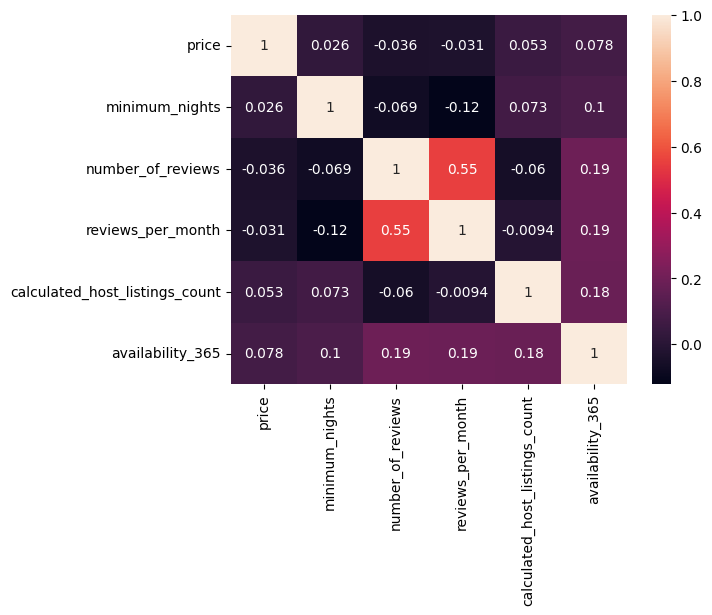

In [67]:
import seaborn as sns

sns.heatmap(numeric_df.corr(), annot=True)